<a href="https://colab.research.google.com/github/johntanas/it1244project/blob/main/code/label_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
onlinedataset=True
if onlinedataset:
  url = "https://drive.google.com/file/d/1TBcW6O9KMRMh9CWf36OIjZwvY-qzH1VS/view?usp=sharing"
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  credit_record=pd.read_csv(url,index_col=0)
else:
  pathtodataset="/content/credit_record.csv"
  credit_record=pd.read_csv(pathtodataset,index_col=0)
path_to_app="/content/cleaned_application.csv"
cleaned_app_df=pd.read_csv(path_to_app,index_col=0)

In [4]:
credit_record

,id,month_bal,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
credit_record["month_bal"].unique(),credit_record["status"].unique()

(array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
        -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
        -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
        -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
        -52, -53, -54, -55, -56, -57, -58, -59, -60]),
 array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object))

In [6]:
to_avg={"X":-1,"C":0}
for i in range(6):
  to_avg[str(i)]=i+1

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
credit_record=credit_record.replace({"status":to_avg})

In [20]:
credit_record[credit_record["status"]>1]

,id,month_bal,status
150,5001718,-8,2
154,5001718,-12,2
224,5001720,0,2
227,5001720,-3,2
228,5001720,-4,2
...,...,...,...
1048241,5150464,-9,2
1048242,5150464,-10,2
1048243,5150464,-11,2
1048244,5150464,-12,2


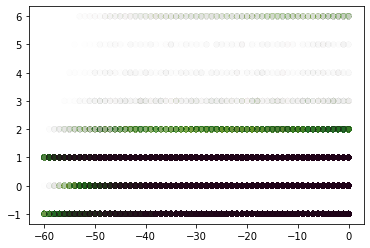

In [18]:
plt.scatter(credit_record["month_bal"],credit_record["status"],alpha=0.005,c=credit_record["id"])
plt.show()

In [56]:
max_data=credit_record.groupby("id").max()["status"]

(array([ 4536.,  1417., 34682.,     0.,  4683.,   336.,     0.,    88.,
           48.,   195.]),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]),
 <a list of 10 Patch objects>)

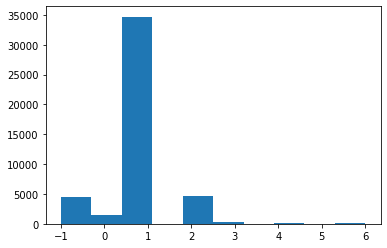

In [57]:
plt.hist(max_data)

In [58]:
X=StandardScaler().fit_transform(np.array(max_data).reshape(-1,1))

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [59]:
inertias = []
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)
  
    mapping2[k] = kmeanModel.inertia_

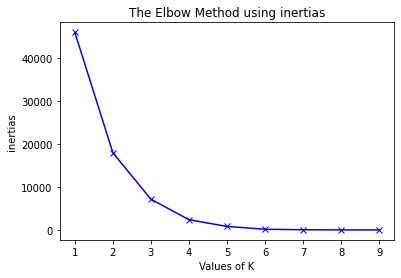

In [60]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertias')
plt.title('The Elbow Method using inertias')
plt.show()

It seems K=4 is the elbow

In [63]:
label1=credit_record.copy()

We repeat Kmeans with 30 random states as 30 already is a statisically large sample size

In [64]:
maxInertia=float("INF")
bestkmeans=None
for i in range(30):
  kmeanModel = KMeans(n_clusters=4,random_state=i).fit(X)
  kmeanModel.fit(X)
  if kmeanModel.inertia_<maxInertia:
    print(f"better clusters found with inertia = {kmeanModel.inertia_} at \n{kmeanModel.cluster_centers_}")
    bestkmeans=kmeanModel
    maxInertia=kmeanModel.inertia_


better clusters found with inertia = 2379.5322650480475 at 
[[-2.02437326]
 [ 0.09694962]
 [ 1.38149914]
 [ 5.30194336]]


In [53]:
label1["label"]=bestkmeans.labels_

In [55]:
bestkmeans.cluster_centers_

array([[-2.02437326],
       [ 0.09694962],
       [ 1.38149914],
       [ 5.30194336]])

The kmeans is not clustering the data properly as the data is skewed

In [80]:
label2=pd.DataFrame(credit_record.groupby("id")["status"].max())>1

In [84]:
label2["status"]=label2['status'].astype(int)

In [90]:
label2.to_csv("max_label.csv")